In [8]:
# improt relevant packacges
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.ticker
from matplotlib.ticker import ScalarFormatter

In [9]:
# read the inventory (volumes column entitled "vol")
voldata= pd.read_csv('FILENAME.csv')

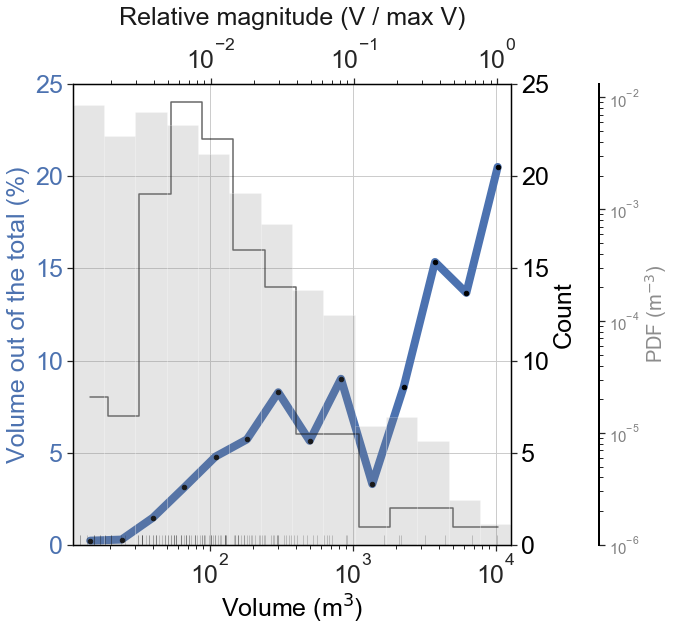

In [19]:
# choose seaborn style
sns.set_style("whitegrid")

# define the data range and number of bins (15 in this example)
mybins=np.logspace(np.log10(voldata['vol'].min()), np.log10(voldata['vol'].max())+0.1, 15)

fig,ax= plt.subplots(figsize=(8,8))

# calculate histogram and density
density, bins, patche = plt.hist(voldata['vol'].dropna(), bins=mybins, density=False, alpha=0)
densityT, binsT, patcheT = plt.hist(voldata['vol'].dropna(), bins=mybins, density=True, alpha=0)
widths = (bins[1:] - bins[:-1]); binsloc = bins[:-1] + widths/2

# calculate GE
VolCutCnt=pd.cut(voldata['vol'].dropna(), mybins).value_counts()
VolCutSum=voldata['vol'].dropna().groupby(pd.cut(voldata['vol'].dropna(), mybins)).sum()
Volplt= plt.plot(binsloc,100*VolCutSum/voldata['vol'].dropna().sum(),c='b', linestyle='-', lw=8, marker='o', ms=2, zorder=1000)
Volscat= plt.scatter(binsloc,100*VolCutSum/voldata['vol'].dropna().sum(),s=20,c='black', zorder=1001)


# adjusting figure axes (main horizonal and GE)
for spine in ax.spines.values():
        spine.set_edgecolor('black')  
plt.xlim(mybins[0], mybins[-1])
plt.ylim(0, (100*VolCutSum/voldata['vol'].sum()).max()+5)
plt.xscale('log')
plt.ylabel('Volume out of the total (%)', size=25, color= 'b',labelpad=5)
plt.xlabel(r'Volume (m$^3$)', color='black', size= 25 )
ax.tick_params(axis='x',labelsize=25)
ax.tick_params(axis='y', labelcolor='b',labelsize=25)

# setting the GE ticks range and spacing
ax_yticks = np.arange(0,26,10)
ax_yrange = (ax_yticks[0], ax_yticks[-1])
ax.set_ylim(ax_yrange)


# adjusting vertiacel axis of the histogram and plotting it
ax2 = ax.twinx()
ax2.tick_params(axis='y', labelcolor='black')
fig.tight_layout()
ax2.grid(False)
ax2.set_ylabel('Count', color='black', size =25)
ax2.set_ylim(0,VolCutCnt.max() +VolCutCnt.max()*0.2)
ax2.step(binsloc,(density), where='mid',c='black', alpha=0.6)
ax2.tick_params(labelsize=25)
# setting the histogram (count) ticks range and spacing
ax2_yticks = np.arange(0,26,5)
ax2_yrange = (ax2_yticks[0], ax2_yticks[-1])
ax2.set_yticks(ax2_yticks)
ax2.set_ylim(ax2_yrange)

# rug plot
ax.plot(voldata['vol'].dropna(), np.zeros(voldata['vol'].dropna().shape), 'b+', ms=20, zorder=2000, alpha=0.2, color= 'black')


# adjusting vertiacel axis of the PDF and plotting it
ax3 = ax.twinx()
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
ax3.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(ax3)
ax3.hist(voldata['vol'].dropna(), bins=mybins, density=True, alpha=0.2, zorder=-100, color='gray')
ax3.set_ylabel(r'PDF (m$^{-3}$)', color='gray', size= 20, alpha=0.9) 
ax3.set_yscale(u'log')
ax3.grid(False)
ax3.tick_params(labelsize=15, axis='y', labelcolor='gray')
ax3.spines["right"].set_visible(True); ax3.spines["right"].set_linewidth(2); ax3.spines["right"].set_color("black")

# adjusting the magnitude horizontal axis
ax5 = ax.twiny()
ax5.plot((binsloc)/voldata['vol'].max(),100*VolCutSum/voldata['vol'].sum(),c='g', linestyle='--', lw=3, marker='o', ms=2,zorder=500) # Create a dummy plot
ax5.cla()
ax5.grid(None)
ax5.set_xlim(mybins[0]/voldata["vol"].max(), (mybins[-1])/voldata['vol'].max())
ax5.set_xscale('log')
ax5.set_xlabel('Relative magnitude (V / max V)', color='black', size= 25, alpha=0.9, labelpad=15) 
ax5.tick_params(labelsize=25)
ax5_yticks = ax2_yticks
ax5_yrange = (ax5_yticks[0], ax5_yticks[-1])
ax5.set_yticks(ax5_yticks)
ax5.set_ylim(ax5_yrange)
for spine in ax5.spines.values():
        spine.set_edgecolor('black')


# show and save
plt.show()
fig.savefig('OUTPUT_GE_FIG.png', bbox_inches = 'tight')  